# Data and Libraries import

In [32]:
# Play an audio beep. Any audio URL will do.
from google.colab import output

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# DATASET_PATH = '/content/drive/My Drive/'

Mounted at /content/drive


In [2]:
%pwd
%cd drive/My\ Drive/BERT_NLP/

/content/drive/My Drive/BERT_NLP


In [3]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 5.4 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
     |████████████████████████████████| 895 kB 45.1 MB/s 
     |████████████████████████████████| 6.5 MB 32.3 MB/s 
     |████████████████████████████████| 596 kB 28.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", problem_type="multi_label_classification")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [5]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [6]:
import tensorflow as tf
import pandas as pd


In [7]:
# URL = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

# dataset = tf.keras.utils.get_file(fname="aclImdb_v1.tar.gz", 
#                                   origin=URL,
#                                   untar=True,
#                                   cache_dir='.',
#                                   cache_subdir='')

# colnames=["LABEL_COLUMN",'tweet_id', 'DATA_COLUMN'] 
tweets_df = pd.read_csv('datasets/argument_dataset.csv', ',', header=0)
tweets_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,Tweet,musawar_score,ali_score,average_score,argument_score
0,"It’s Super Bowl week, and Trump is using a pre...",3.0,5.0,4.0,1
1,Turns out Donald Trump was potentially exposed...,4.0,4.0,4.0,1
2,Had a totally surreal author moment at B&N tod...,3.0,5.0,4.0,1
3,"Forgive me, but I have to say this: imagine if...",3.0,4.0,3.5,1
4,The ban imposed on #kunalkamra by 4 airlines i...,4.0,3.0,3.5,1


In [8]:
cols = tweets_df[['Tweet', 'argument_score']]
data = cols.copy()

In [9]:
data.head()

,Tweet,argument_score
0,"It’s Super Bowl week, and Trump is using a pre...",1
1,Turns out Donald Trump was potentially exposed...,1
2,Had a totally surreal author moment at B&N tod...,1
3,"Forgive me, but I have to say this: imagine if...",1
4,The ban imposed on #kunalkamra by 4 airlines i...,1


# Data (Pre) Processing

In [10]:
!pip install -U spacy

     |████████████████████████████████| 6.0 MB 4.1 MB/s 
     |████████████████████████████████| 42 kB 759 kB/s 
     |████████████████████████████████| 181 kB 38.7 MB/s 
     |████████████████████████████████| 653 kB 10.8 MB/s 
     |████████████████████████████████| 451 kB 31.3 MB/s 
     |████████████████████████████████| 10.1 MB 9.1 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [ ]:
!python -m spacy download en_core_web_sm

In [15]:
import spacy
nlp = spacy.load('en_core_web_sm')
stopwords = nlp.Defaults.stop_words

In [ ]:
doc = nlp("i'm here and what are you doing")

# # n = [token.sents for token in doc]
# # n
# doc.sents

In [12]:
# @title Remove Links and Hashtags

import re
import string

def removeLinks(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def cleanAtTheRateAndHashtags(text):
    junk = ['\u2066','@', '#', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
    words = text.split()
    res =[]
    for word in words:
      # print(word[0])
      if word[0] not in junk:
        res.append(word)
    return " ".join(res)

def deEmojify(text):
    "function to remove emojis from text"
    regrex_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return regrex_pattern.sub(r'',text)

def cleanseText(text):
    text = removeLinks(text)
    # print(text)
    txt = cleanAtTheRateAndHashtags(text)
    # re.sub(r'[^\x00-\x7F]+','', text)
    # print(txt)
    txt = deEmojify(txt)
    return txt.encode('ascii', 'ignore').decode('ascii')

# remove links and hashtags from the dataframe
data['Tweet'] = data['Tweet'].apply(lambda tweet: cleanseText(tweet))

data.head()

,Tweet,argument_score
0,"Its Super Bowl week, and Trump is using a prev...",1
1,Turns out Donald Trump was potentially exposed...,1
2,Had a totally surreal author moment at B&N tod...,1
3,"Forgive me, but I have to say this: imagine if...",1
4,The ban imposed on by airlines is the act of a...,1


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [16]:
# @title Process Text (Preprocess)

def process_text(text):
  doc = nlp(text)
  normalized_text = " ".join(token.norm_ for token in doc)
  doc = nlp(normalized_text)
  lemmed_text = " ".join(token.lemma_ for token in doc if not token.is_punct)
  # for token in doc:
  #   print(token , token.pos_)
  return lemmed_text

data['DATA_COLUMN'] = data['Tweet'].apply(lambda text: process_text(text))
data.head(20)

,Tweet,argument_score,DATA_COLUMN
0,"Its Super Bowl week, and Trump is using a prev...",1,its super bowl week and trump be use a prevent...
1,Turns out Donald Trump was potentially exposed...,1,turn out donald trump be potentially expose to...
2,Had a totally surreal author moment at B&N tod...,1,have a totally surreal author moment at b&n to...
3,"Forgive me, but I have to say this: imagine if...",1,forgive I but I have to say this imagine if ba...
4,The ban imposed on by airlines is the act of a...,1,the ban impose on by airline be the act of a c...
5,The old patient stayed in Wu Han hospital for ...,1,the old patient stay in wu han hospital for ne...
6,Ok Star Trek friends.... I want your opinion. ...,1,ok star trek friend I want your opinion how do...
7,Thousands of Palestinians mourn the body of th...,0,thousand of palestinians mourn the body of the...
8,I spent months writing a page book on the hist...,1,I spend month write a page book on the history...
9,Wow-Pence either does not know that Trump is r...,0,wow pence either do not know that trump be rol...


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
process_text("it's not Super Bowl week, and Trump is using a prevent defense. The strategy sometimes backfires iN football. It may fail for Trump, too. ⁦@NBCNews⁩ https://t.co/gOvWcEdif0dif0")

In [17]:
cols = data[['DATA_COLUMN', 'argument_score']]
tweets_data = cols.copy()
tweets_data.rename(columns={"argument_score": "LABEL_COLUMN"}, inplace=True)
tweets_data.head()

# Model ETC Stuff

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [20]:
tweets_data = shuffle(tweets_data)

In [21]:
# train_full, test = train_test_split(tweets_data, test_size=0.3)
train, test = train_test_split(tweets_data, test_size=0.2)
# test = test_df_new
train.shape

(136, 2)

In [22]:
train.LABEL_COLUMN.value_counts()

0    76
1    60
Name: LABEL_COLUMN, dtype: int64

In [24]:
# @title Examples Prepare Funcs

InputExample(guid=None,
             text_a = "Hello, world",
             text_b = None,
             label = 1)

def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, validation_InputExamples

  train_InputExamples, validation_InputExamples = convert_data_to_examples(train, 
                                                                           test, 
                                                                           'DATA_COLUMN', 
                                                                           'LABEL_COLUMN')
  
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


DATA_COLUMN = 'DATA_COLUMN'
LABEL_COLUMN = 'LABEL_COLUMN'

In [25]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

history = model.fit(train_data, epochs=3, validation_data=validation_data)


while True:
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

Epoch 1/3
10/10 [==============================] - 72s 2s/step - loss: 0.6646 - accuracy: 0.6140 - val_loss: 0.6274 - val_accuracy: 0.7429
Epoch 2/3
10/10 [==============================] - 15s 1s/step - loss: 0.4552 - accuracy: 0.8897 - val_loss: 0.5801 - val_accuracy: 0.6857
Epoch 3/3
10/10 [==============================] - 14s 1s/step - loss: 0.2115 - accuracy: 0.9890 - val_loss: 0.6449 - val_accuracy: 0.7143


In [27]:
import matplotlib.pyplot as plt

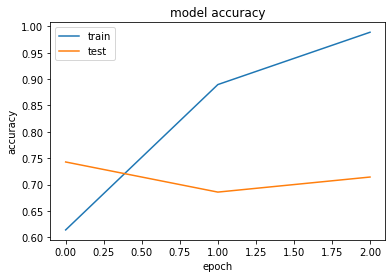

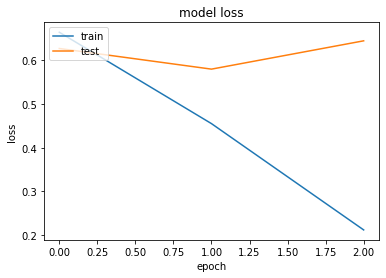

In [28]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
while True:
  pass

# Testing

In [29]:

preds_list = []
test_data = [['Trump, signing the $8.3B coronavirus bill w/Azar standing over him, was asked why he canceled his trip to CDC.  Azar quickly interjected that Trump had sent him to CDC instead.  Trump then clarified that the trip was scuttled b/c CDC was concerned an official there had the virus.', 0],
             ['Garfield from @StrayCatsWM has had his leg amputation surgery today. He’s recovering well and we’re confident that he’ll manage just fine on three legs 💙🐱 #CatsOfTwitter https://t.co/0ujCkeDiyv', 1],
             ['Adrienne Posta is 71 today, Happy Birthday Adrienne 🎂🎉 https://t.co/NACZgxouV9', 0],
             ['So I feel really hot and sweaty and my heads thumping .... found this mosquito bite on my leg this morning ... 🦟😭 https://t.co/1qertDJYdY', 0],
             ["The Press Secretary says that what President Trump “cares about is taxpayer money” and making sure “there is no corruption tied to it.”  That doesn't add up. Trump has spent more than $100 million in taxpayer money to golf at courses he still owns and profits from.", 1],
             ['David Jason is 80 today, Happy Birthday David 🎂🎉 https://t.co/iPgaLz5rzp', 0],
             ['I know #Coronavirus is spreading outside of China, but total active cases are still falling.  Active cases are the only ones that can spread the virus.  Today 43,293 vs 44,314 yesterday.  The press keeps reporting total cases, and deaths, but not recoveries. https://t.co/hqYmqxV7ji', 1],
             ['Suicide is killing more people than Coronavirus. How about we all stock up on smiling at strangers instead?', 1],
             ['There are about 10,000 doctor vacancies and 43,000 nurse vacancies in the NHS.  This is not a problem that will be solved in the short term. The Government have left the population exposed to unnecessary risk. They have no one to blame but themselves.  https://t.co/VTyCaEMp3T', 1],
             ['NBA team doctors and trainers will have a conference call on Monday morning to discuss next steps with coronavirus, league sources tell ESPN.', 0],
             ['Not just anyone can pull off these bad boys, but I kinda feel  I can 😉 https://t.co/CsnBZxyPbj', 0],
             ['America’s Greatest President is trending.  Glad people are remembering and honoring President Obama.', 0],
             ['Fearful their tax cuts are in jeopardy, wealthy Koch donors plan to spend big to hold GOP Senate Majority in 2020 --  https://t.co/9bniHAjL34', 1],
             ['The reaction to the Joe Rogan endorsement is a perfect encapsulation of why progressives will probably lose this election.', 1],
             ['The nonchalance with which people Are like “corona only kills old people”makes me realize how much some of you truly hate your parents.',0],
             ['Corona virus is basically the flu. Is every flu season a pandemic?  There are literally millions and millions of active flu cases world wide right now.  It’s flu season for God sake. Isn’t the reaction just a little over the top?', 1],
             ["Birthday girl🥰❤️  @jeorella__ https://t.co/qtldCSJPfr", 0],
             ["Trump thinks COVID-19 is causing the stock market to drop.  It’s not.   What’s causing it to drop is that there’s a difficult situation (the virus) that needs to be dealt with and the person in charge has the impulse control of a 5-year-old.", 1],
             ["this is the BEST set of info I’ve found on corona virus and it’s worth watching the full 10mins https://t.co/oTNt5Cxg8j", 0],
             ['So Dr. Fauci not only admits honestly that we are failing on testing, but doing worse than other countries.  Ugh. Not the behavior usually associated with a "superpower." https://t.co/sVbeLXblLF', 1],
             ["Coronavirus? Who’s afraid? https://t.co/nNIxVwwGLB", 0],
             ["Sen. Dianne Feinstein Leans Toward Voting for Trump Acquittal https://t.co/Ty2KAbO16s", 0],
             ["Proud to be Somali. Proud to be African. Proud to be British. https://t.co/VY41Kz9y4j", 0],
             ["Get ready for even more surprise reveals, steamy romances, and heartwarming moments from #YR, because we've got big news! 🎉 The Young and the Restless has been renewed through 2024. Find out more here: https://t.co/Wo3BXnlXg2 https://t.co/TdWKhy1itI", 1],
             ]
pred_sentences = [process_text(cleanseText(text)) for text,arg in test_data]
# pred_sentences

In [30]:
tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
labels = ['Not an Argument', 'Argument']
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
for i in range(len(pred_sentences)):
  test_data[i].append(label[i])

In [31]:
df = pd.DataFrame(test_data)

df.columns = ['Tweet', 'True Label', 'Predicted Label']
df.head()

,Tweet,True Label,Predicted Label
0,"Trump, signing the $8.3B coronavirus bill w/Az...",0,0
1,Garfield from @StrayCatsWM has had his leg amp...,1,1
2,"Adrienne Posta is 71 today, Happy Birthday Adr...",0,0
3,So I feel really hot and sweaty and my heads t...,0,0
4,The Press Secretary says that what President T...,1,1


In [36]:
df

,Tweet,True Label,Predicted Label
0,"Trump, signing the $8.3B coronavirus bill w/Az...",0,0
1,Garfield from @StrayCatsWM has had his leg amp...,1,1
2,"Adrienne Posta is 71 today, Happy Birthday Adr...",0,0
3,So I feel really hot and sweaty and my heads t...,0,0
4,The Press Secretary says that what President T...,1,1
5,"David Jason is 80 today, Happy Birthday David ...",0,0
6,I know #Coronavirus is spreading outside of Ch...,1,1
7,Suicide is killing more people than Coronaviru...,1,0
8,"There are about 10,000 doctor vacancies and 43...",1,1
9,NBA team doctors and trainers will have a conf...,0,0


In [ ]:
import time
while True:
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
  time.sleep(0.5)